In [1]:
from pricing.base.rate import Rate
from pricing.base.volatility import Volatility
from utility.types import Maturity

# Pricing Options

## Vanilla Options


In [2]:
from pricing.vanilla_options import VanillaOption


opt = VanillaOption(
    100,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
    option_type="call",
)

opt.compute_price()

5.733960540842027

In [3]:
opt2 = VanillaOption(
    100,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
    option_type="put",
)

opt2.compute_price()

11.36210024410454

## Option digit


In [4]:
from pricing.binary_options import BinaryOption


bin_opt = BinaryOption(
    100,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
    option_type="call",
)
bin_opt.compute_price()

0.3406307870551669

In [5]:
bin_opt2 = BinaryOption(
    100,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
    option_type="put",
)
bin_opt2.compute_price()

0.6196250284290377

# Option strategies

## Straddle


In [ ]:
#TODO: Frontend streamlit (Matthieu)
#TODO: API (Baptiste)
#TODO: Produit Structurés Outperformer/Reversible conversible
#TODO: Strategies option (Matthieu)
#TODO: Options barrières MC (Naim)
#TODO: Surface vol class
#TODO: Calculer les grecques


In [6]:
from pricing.option_strategies import StraddleStrategy


straddle = StraddleStrategy(
    100,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
)
straddle.compute_price()

17.096060784946566

## Strangle strategy

In [7]:

from pricing.option_strategies import StrangleStrategy


straddle = StrangleStrategy(
    100,
    90,
    110,
    Maturity(maturity_in_days=365),
    Rate(rate=0.04),
    Volatility(volatility=0.20),
)
straddle.compute_price()

27.49704205763158

# Pricing Bonds

## ZC


In [8]:
from pricing.fixed_income import ZeroCouponBond


zc_bond = ZeroCouponBond(
    Rate(rate=0.03, rate_type="continuous"), Maturity(maturity_in_days=365), nominal=100
)


zc_bond.compute_price()

97.00412654712278

## Vanilla Bond

using a rate curve interpolation


In [9]:
from pricing.fixed_income import Bond


rate_curve = {
    Maturity(1 / 365): 0.02,
    Maturity(1 / 12): 0.01,
    Maturity(3 / 12): 0.02,
    Maturity(6 / 12): 0.04,
    Maturity(1): 0.06,
    Maturity(3): 0.07,
    Maturity(5): 0.08,
    Maturity(10): 0.1,
}
bond = Bond(
    Rate(
        rate_curve=rate_curve,
        rate_type="continuous",
    ),
    Maturity(maturity_in_days=365 * 5),
    nominal=100,
    coupon_rate=0.02,
    nb_coupon=10,
)

bond.compute_price()

75.11549887185251

Text(0.5, 1.0, 'Rate curve')

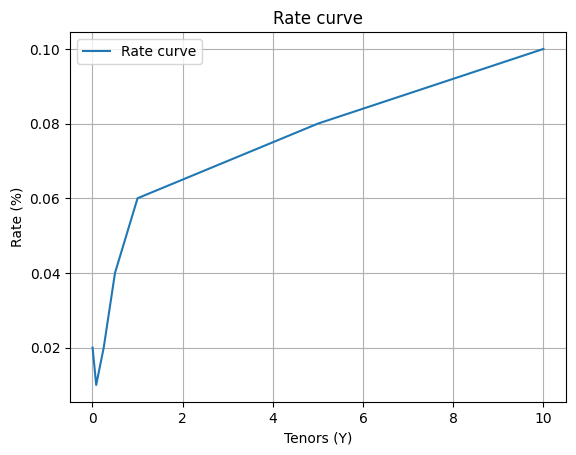

In [10]:
from matplotlib import pyplot as plt


plt.plot(
    [mat.maturity_in_years for mat in rate_curve.keys()],
    [r for r in rate_curve.values()],
    label="Rate curve",
)
plt.xlabel("Tenors (Y)")
# plt.xscale('log')
plt.ylabel("Rate (%)")
plt.grid()
plt.legend()
plt.title("Rate curve")